In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [352]:
df = pd.read_csv("../pruneabletree/tests/results/pruning/all.csv")
dfs = df.loc[df.tool == "scikit"]
dfw = df.loc[df.tool == "weka"]

dataset
activity           -81.30
diabetes           -14.96
german_credit      -54.66
heart-statlog       -8.14
hepatitis           -1.86
houses             -48.42
ionosphere          -2.96
iris                -1.48
letter             -84.96
monks-problems-2    -5.12
tic-tac-toe         -4.84
vote                -0.60
wdbc                -2.68
wine                -1.98
Name: n_nodes, dtype: float64


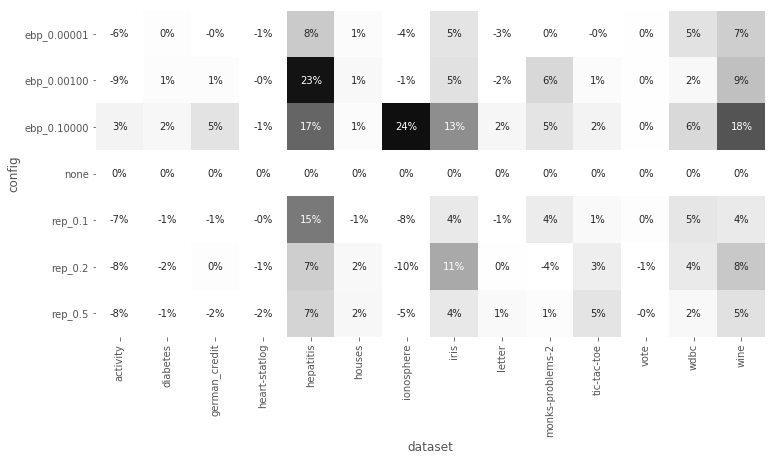

In [363]:
max_nodes_s = dfs.loc[dfs.config == 'none'].groupby(["dataset"])["n_nodes"].mean()
max_nodes_w = dfw.loc[dfw.config == 'none'].groupby(["dataset"])["n_nodes"].mean()
nodes_s = dfs.loc[dfs.config != "early_stop"].groupby(["config", "dataset"]).n_nodes.mean().unstack() / max_nodes_s
nodes_w = dfw.groupby(["config", "dataset"]).n_nodes.mean().unstack() / max_nodes_w

print(max_nodes_s - max_nodes_w)
data = nodes_s - nodes_w
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".0%", vmin=0, vmax=.25, ax=ax, cmap='Greys', cbar=False)

dataset
activity             580.94
diabetes             233.28
german_credit        329.32
heart-statlog         78.22
hepatitis             15.40
houses               499.02
ionosphere            37.06
iris                  16.28
letter              3916.08
monks-problems-2      91.76
tic-tac-toe          143.10
vote                  26.32
wdbc                  34.78
wine                  15.00
Name: n_nodes, dtype: float64
dataset      activity  diabetes  german_credit  heart-statlog  hepatitis  \
config                                                                     
early_stop      18.68      5.00           5.00           5.00       4.72   
ebp_0.00001    162.64      6.06           1.00           4.48       3.74   
ebp_0.00100    252.24      7.70          12.06           9.44       9.62   
ebp_0.10000    502.28     97.28         135.86          32.66      11.30   
none           580.94    233.28         329.32          78.22      15.40   
rep_0.1        167.04     31.24       

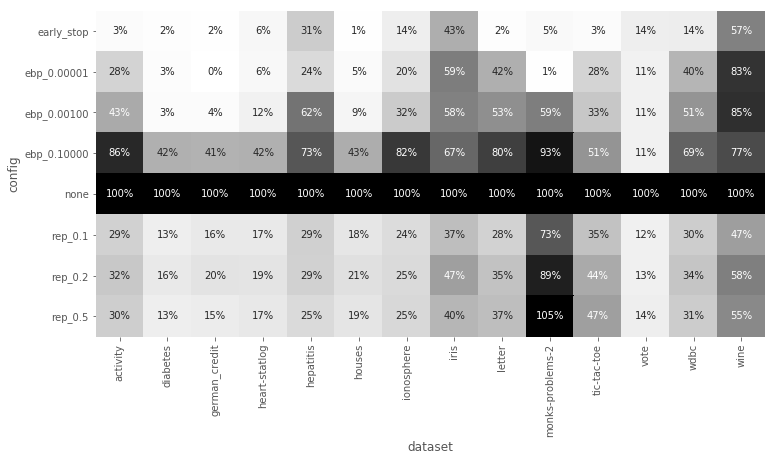

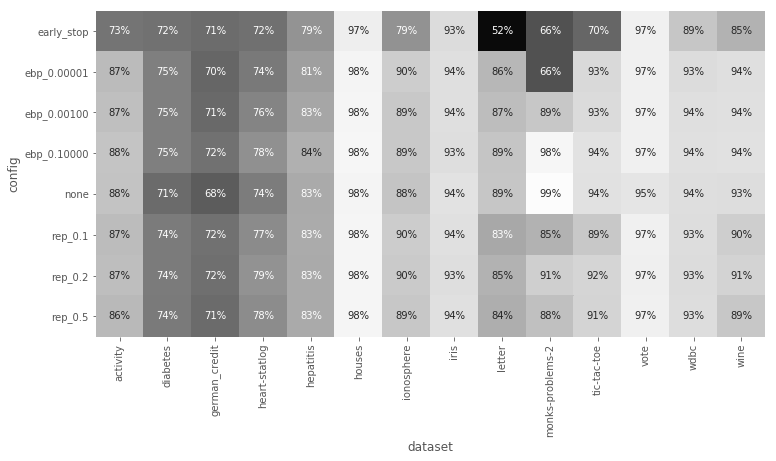

In [350]:
def make_heatmap_norm(param):
    max_nodes = dfs.loc[dfs.config == 'none'].groupby(["dataset"])[param].mean()
#     print(max_nodes)
    data = dfs.groupby(["config", "dataset"])[param].mean().unstack() / max_nodes
#     print(dfs.groupby(["config", "dataset"])[param].mean().unstack())
    f, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(data, annot=True, fmt=".0%", vmin=0, vmax=1, ax=ax, cmap='Greys', cbar=False)
    plt.savefig("../pruneabletree/tests/results/pruning/heatmap_{}.pdf".format(param), bbox_inches="tight")
    
def make_heatmap(param):
    data = dfs.groupby(["config", "dataset"])[param].mean().unstack()
    f, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(data, annot=True, fmt=".0%", vmin=0.5, vmax=1, ax=ax, cmap='gray', cbar=False)
    plt.savefig("../pruneabletree/tests/results/pruning/heatmap_{}.pdf".format(param), bbox_inches="tight")
    
make_heatmap_norm("n_nodes")
#make_heatmap_norm("n_leaves")
make_heatmap("accuracy")
# make_heatmap("f1")

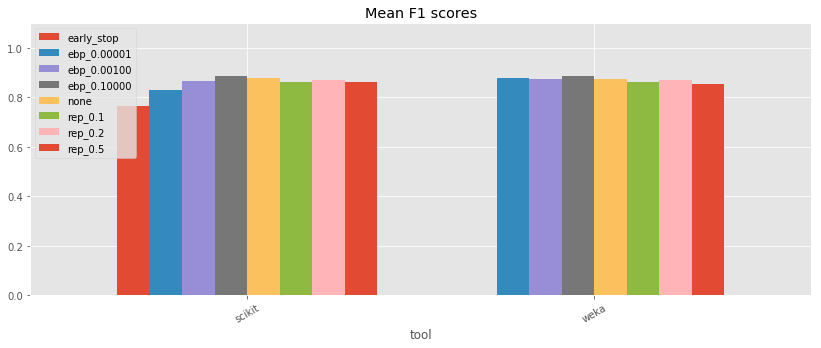

In [238]:
grouped = df.groupby(["tool", "config"]) #"dataset", 
result = grouped.mean().unstack() #"mean_accuracy", 
ax = result["f1"].plot(kind="bar", figsize=(14, 5), ylim=(0, 1.1), rot=30, width=0.75)
plt.title("Mean F1 scores")
plt.legend(loc='upper left') #, bbox_to_anchor=(1.0, 0.5)
#plt.savefig("../pruneabletree/tests/results/pruning/f1.pdf", bbox_inches="tight")

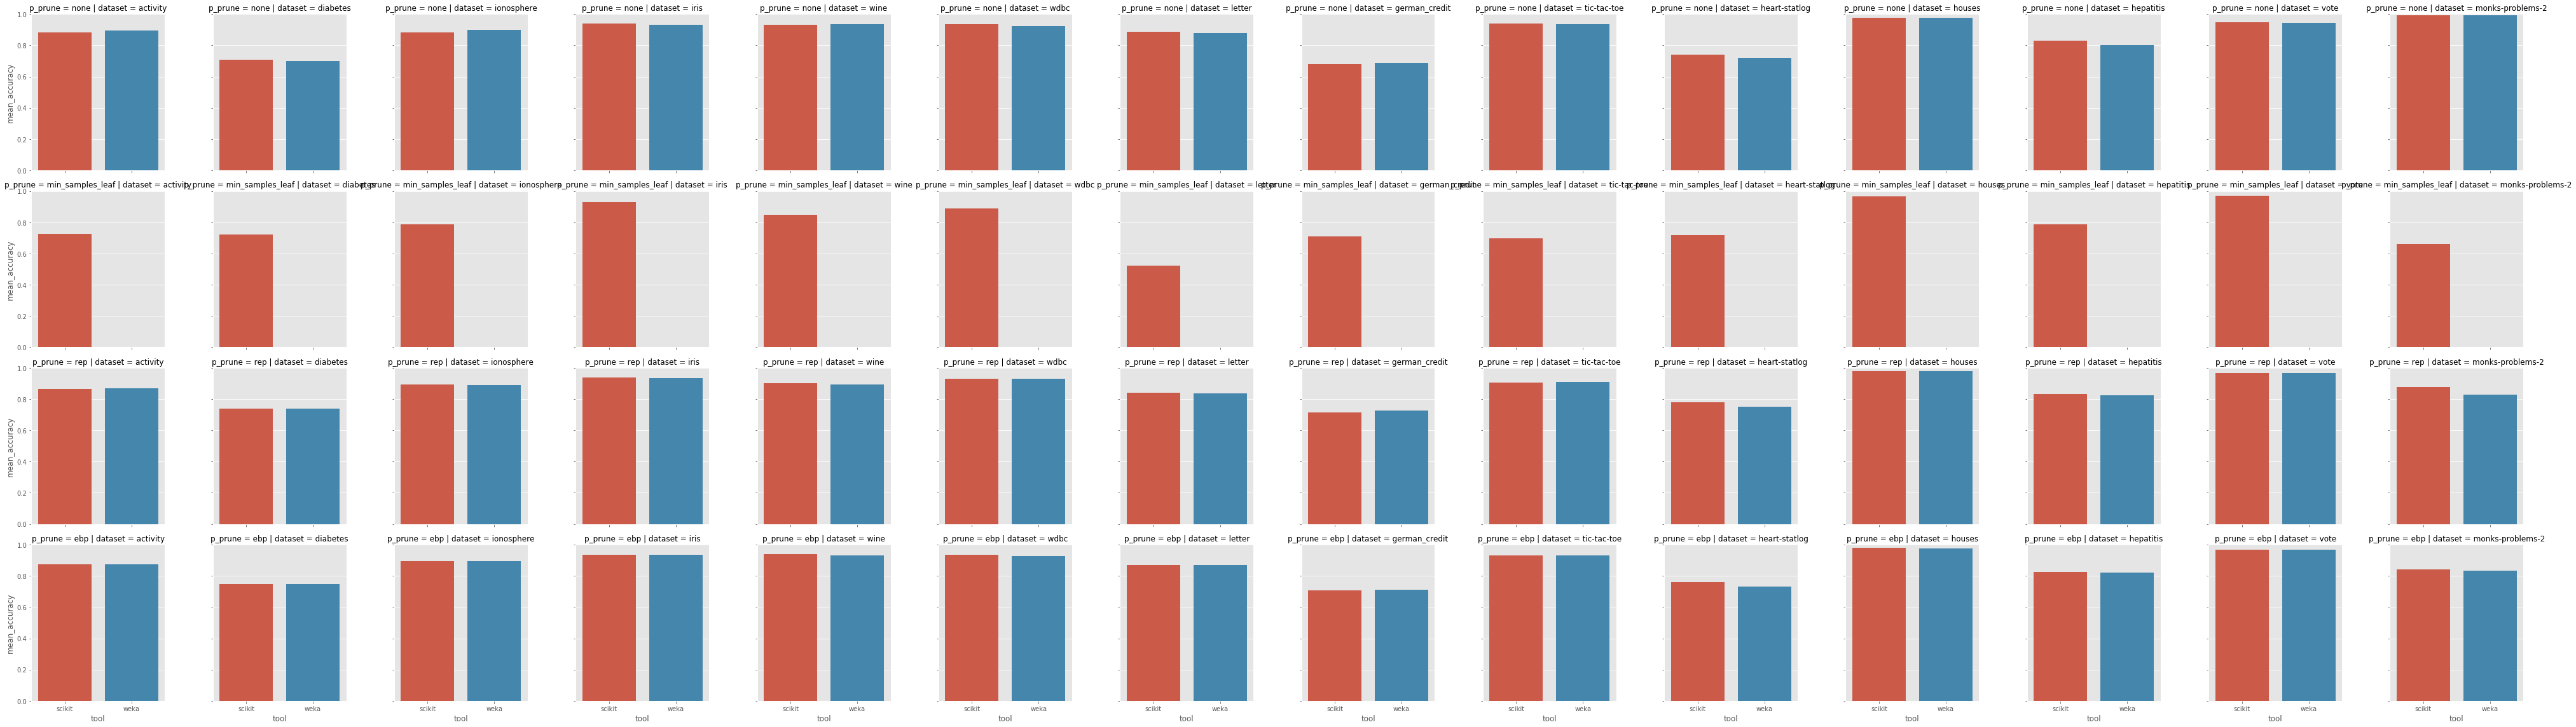

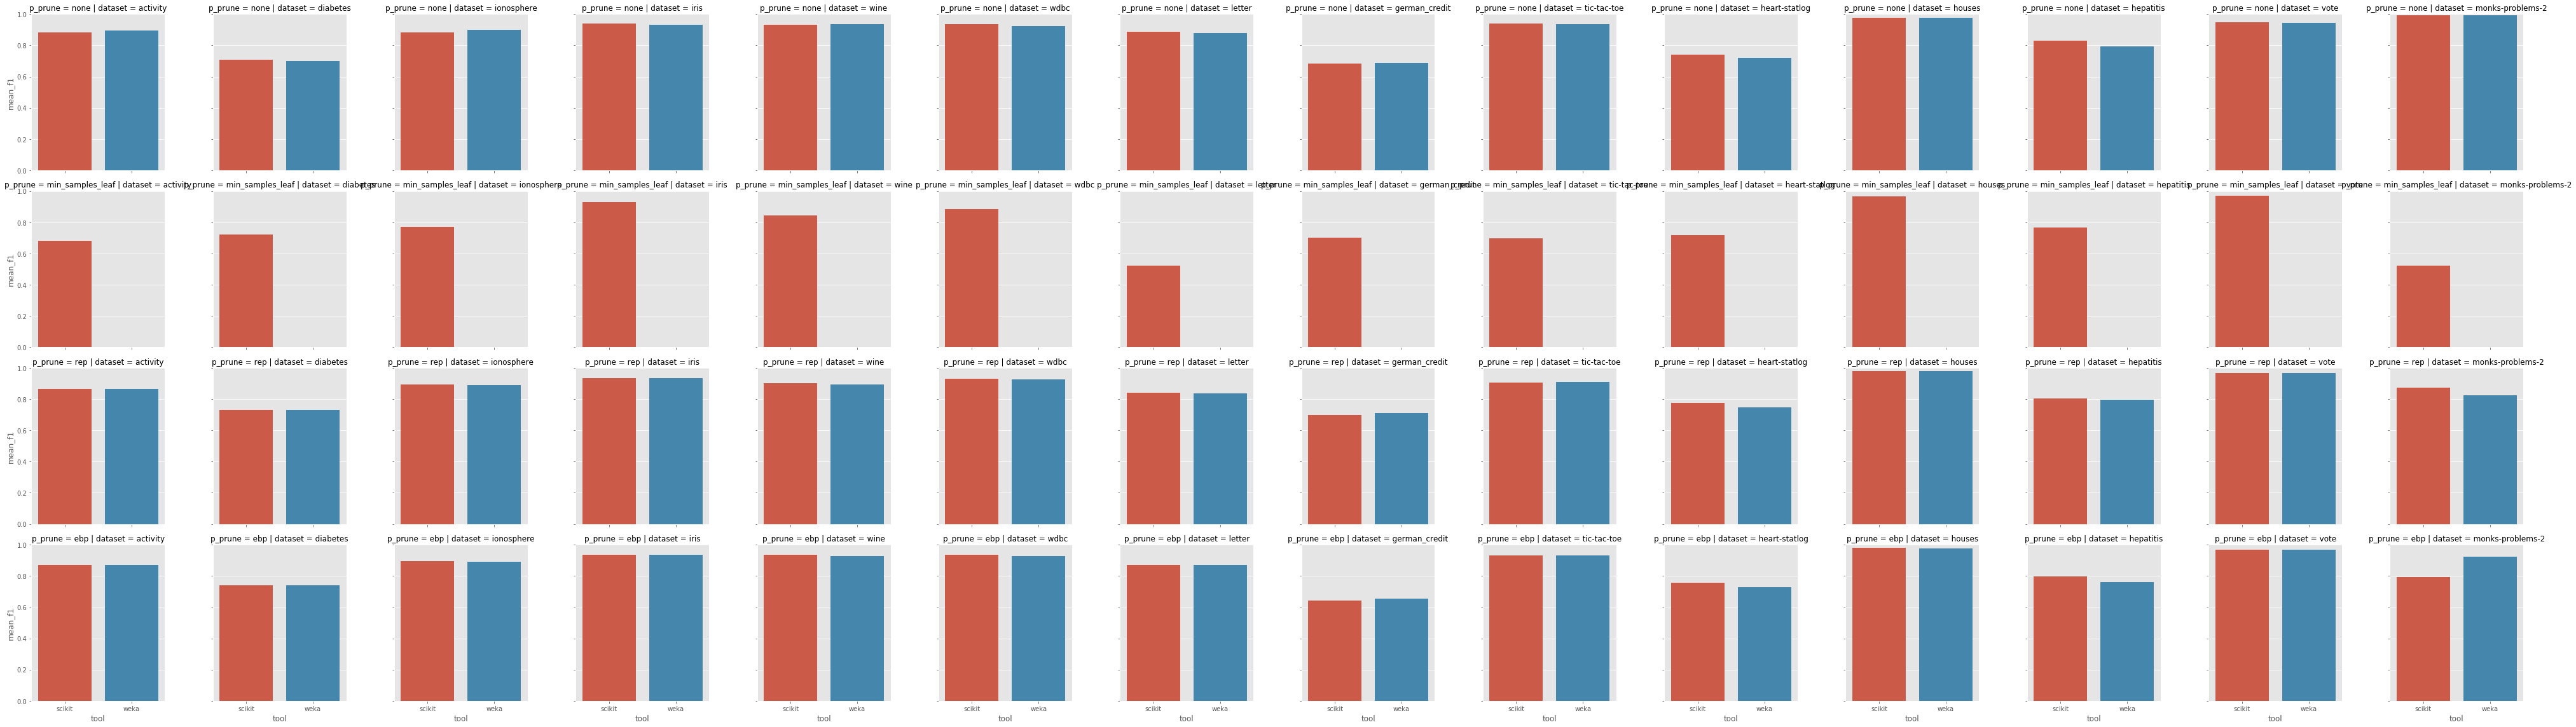

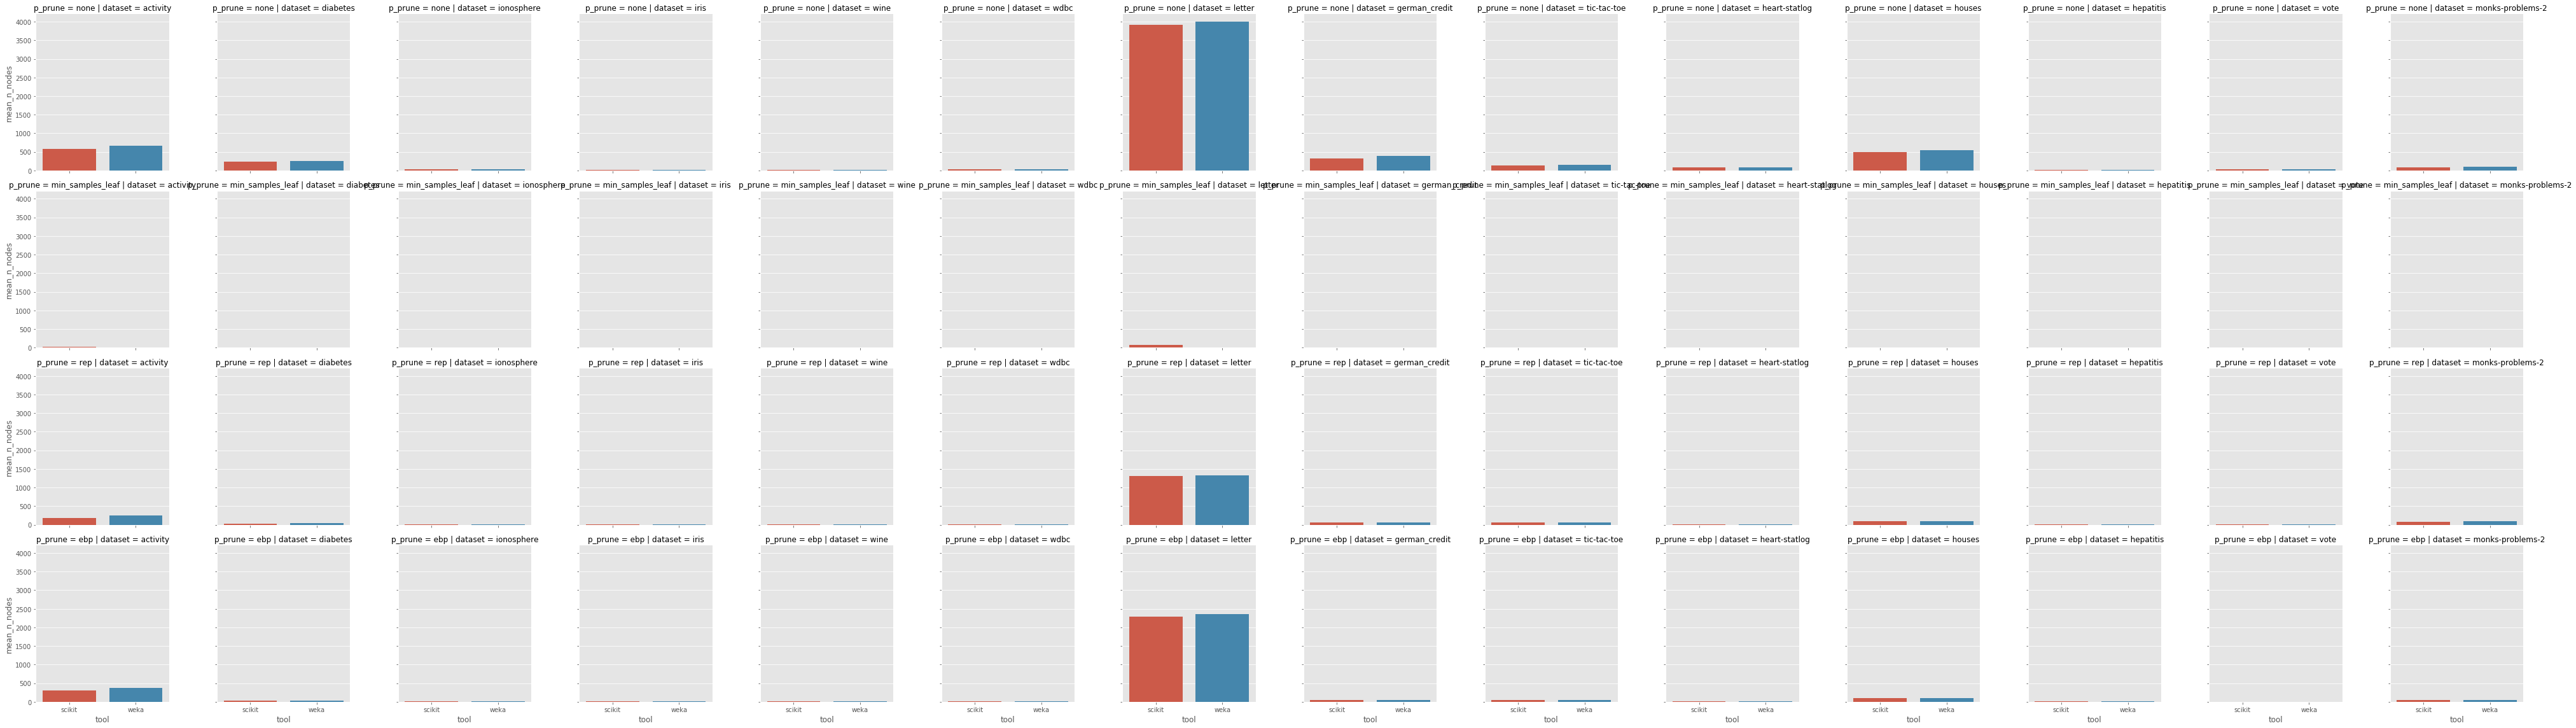

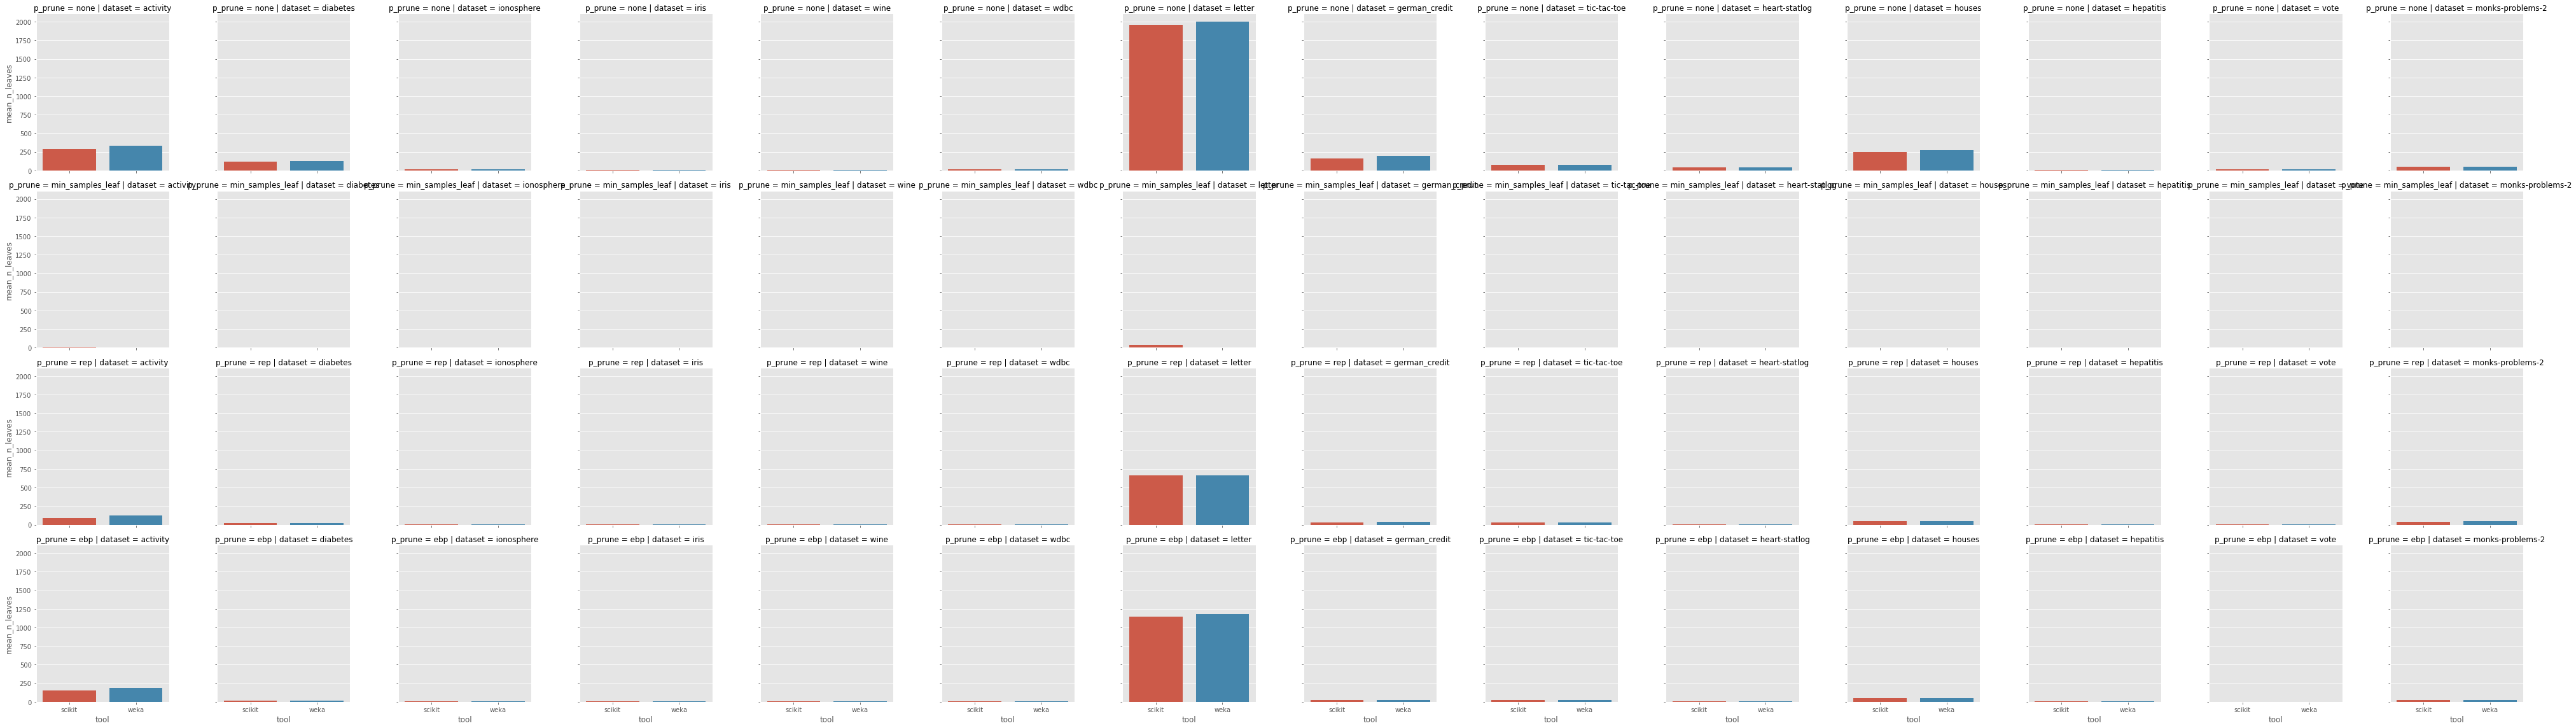

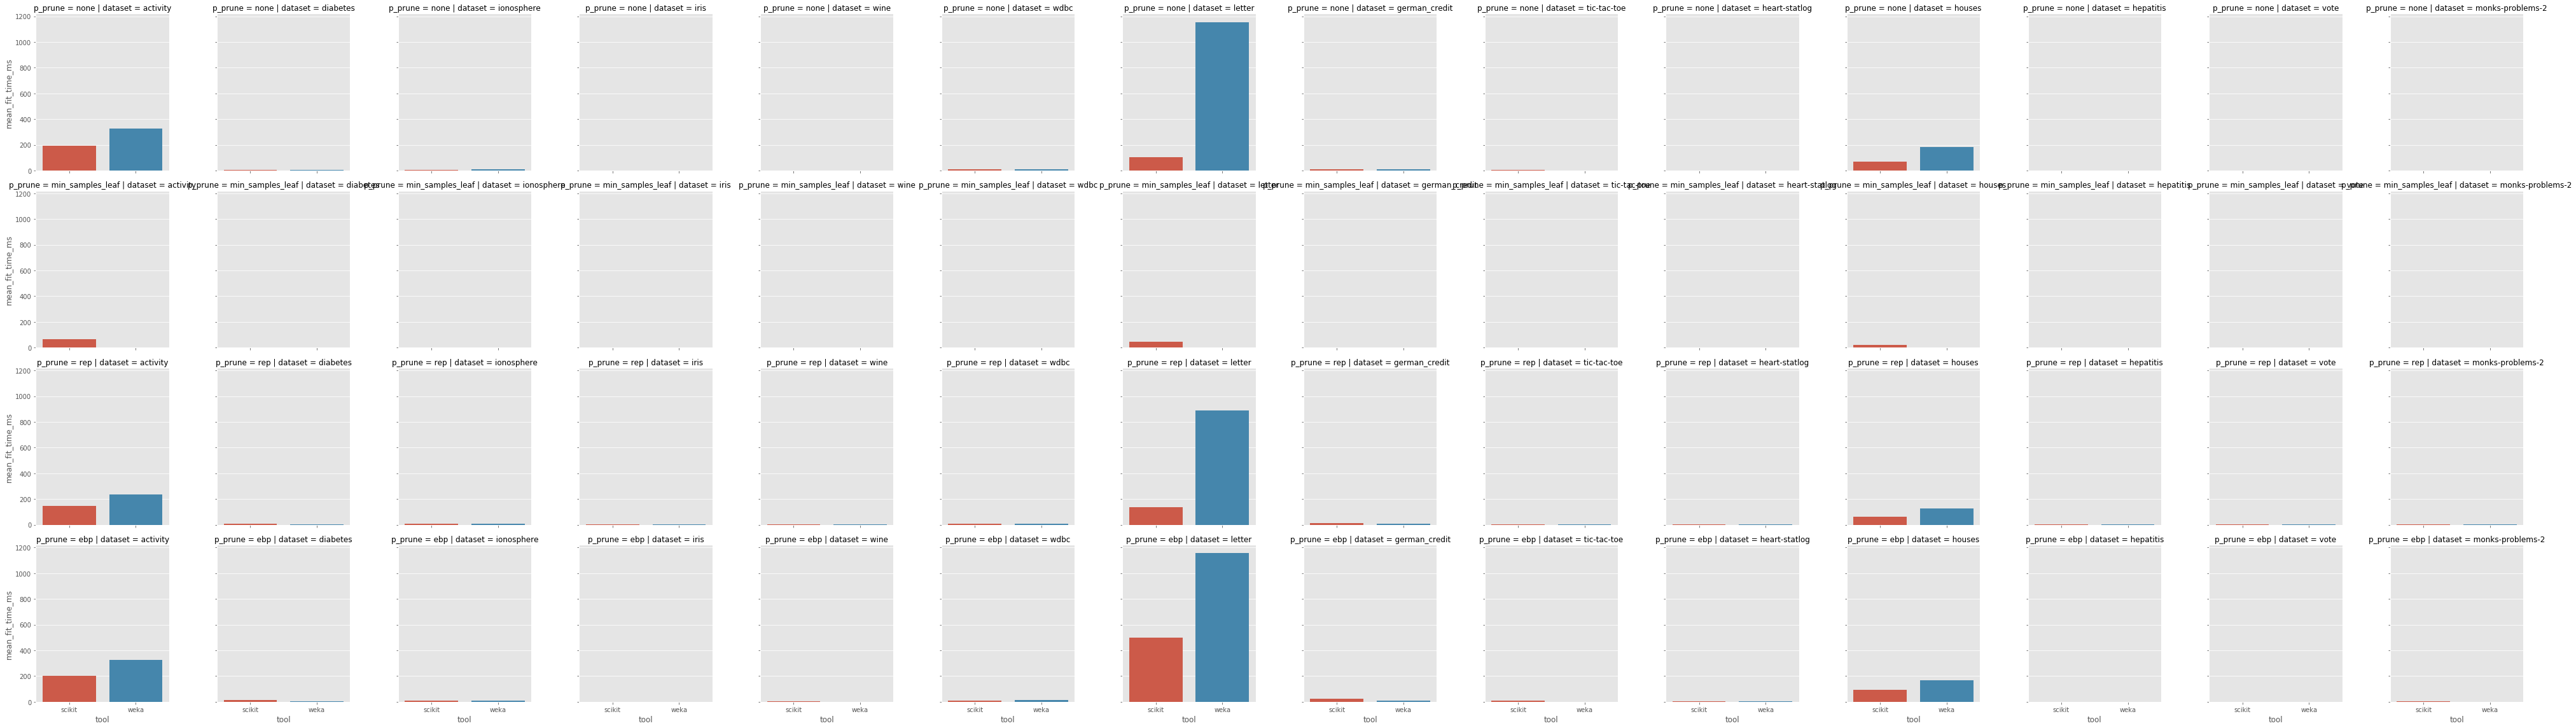

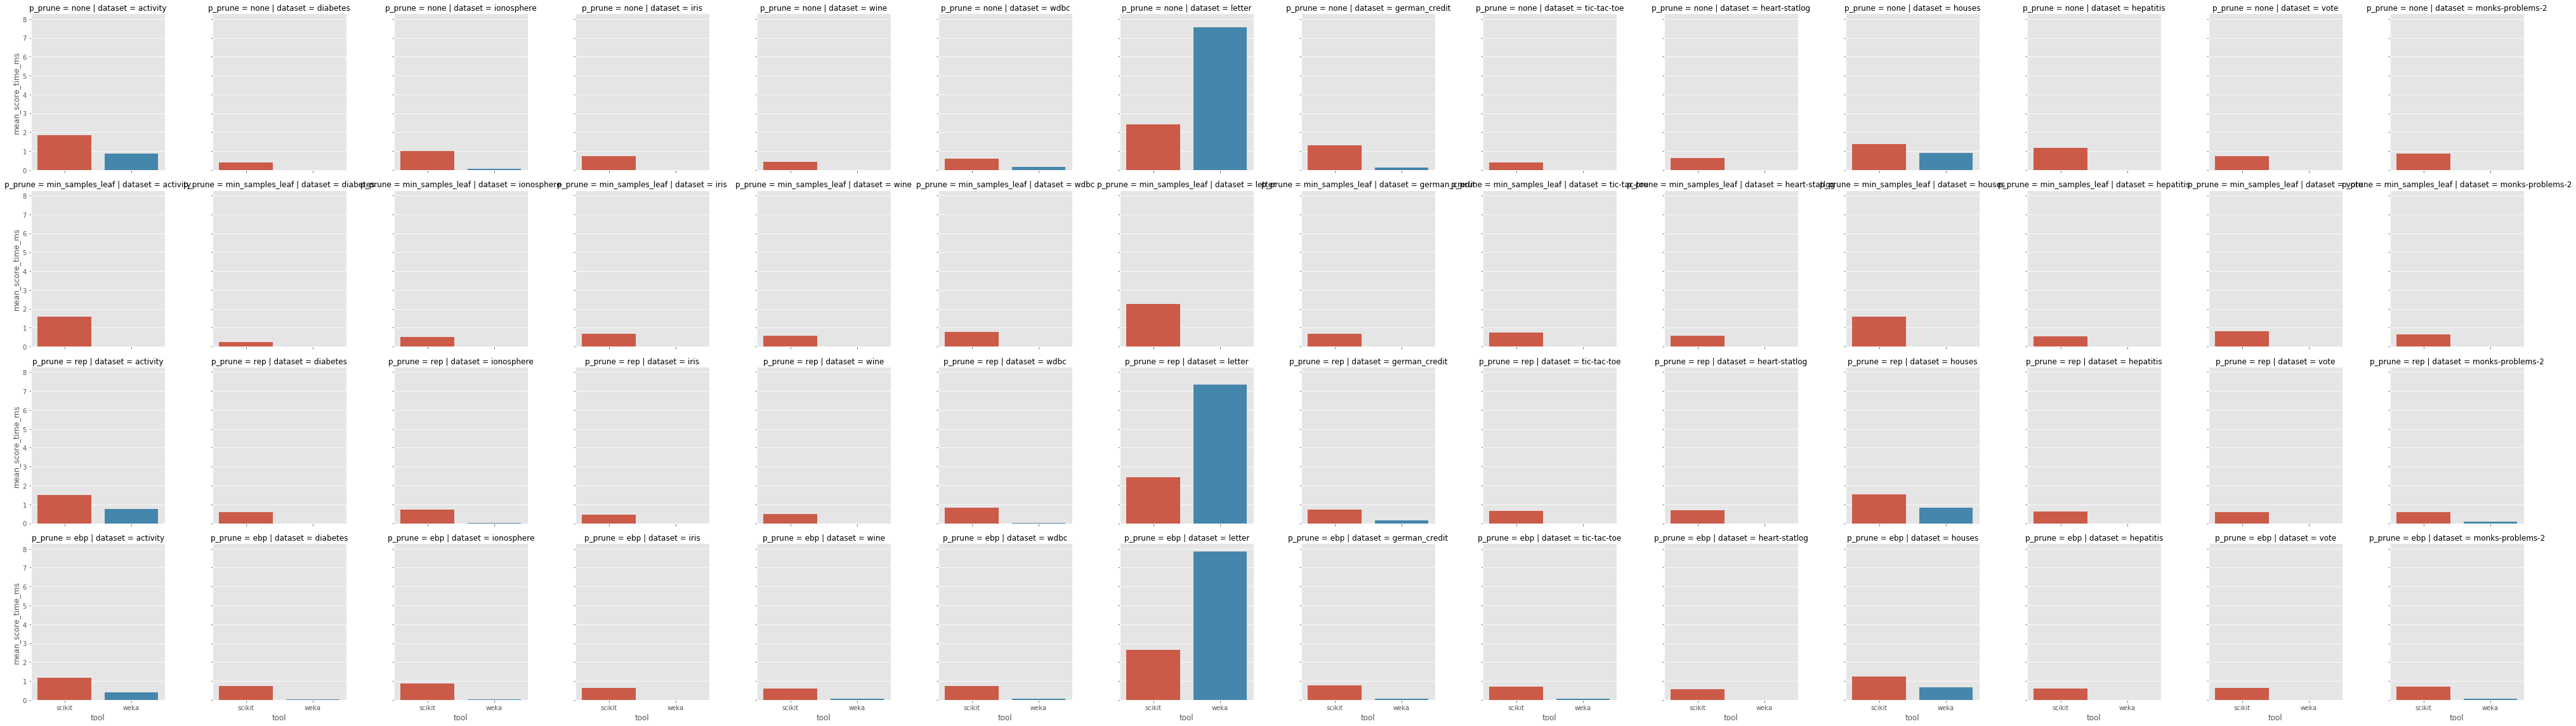

In [18]:
sns.factorplot(col="dataset", row="p_prune", x="tool", data=df, kind="bar", ci=None, y="mean_accuracy").set(ylim=(0, 1))
plt.savefig("../pruneabletree/tests/results/pruning/acc.pdf", bbox_inches="tight")
sns.factorplot(col="dataset", row="p_prune", x="tool", data=df, kind="bar", ci=None, y="mean_f1").set(ylim=(0, 1))
plt.savefig("../pruneabletree/tests/results/pruning/f1.pdf", bbox_inches="tight")
sns.factorplot(col="dataset", row="p_prune", x="tool", data=df, kind="bar", ci=None, y="mean_n_nodes")
plt.savefig("../pruneabletree/tests/results/pruning/nodes.pdf", bbox_inches="tight")
sns.factorplot(col="dataset", row="p_prune", x="tool", data=df, kind="bar", ci=None, y="mean_n_leaves")
plt.savefig("../pruneabletree/tests/results/pruning/leaves.pdf", bbox_inches="tight")
sns.factorplot(col="dataset", row="p_prune", x="tool", data=df, kind="bar", ci=None, y="mean_fit_time_ms")
plt.savefig("../pruneabletree/tests/results/pruning/fit.pdf", bbox_inches="tight")
sns.factorplot(col="dataset", row="p_prune", x="tool", data=df, kind="bar", ci=None, y="mean_score_time_ms")
plt.savefig("../pruneabletree/tests/results/pruning/score.pdf", bbox_inches="tight")